In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import extcolors
import pandas as pd

In [11]:
def rgb2hex(r, g, b):
    return ('#{:X}{:X}{:X}').format(r, g, b)

In [29]:
input_name = '/Users/valentinafeve/Datasets/21MayA_cropped/images/4673239620274909870/-6288526743992101902.jpg'
output_width = 100                   #set the output size
img = Image.open(input_name)

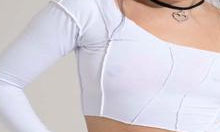

In [30]:
# Get the size of the image
width, height = img.size

# Calculate the crop size
crop_size = (int(width * 0.09), int(height * 0.09), int(width * 0.91), int(height * 0.91))

# Crop the image
img = img.crop(crop_size)
img

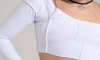

In [31]:
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize))
img

In [38]:
colors_x = extcolors.extract_from_image(img, tolerance = 10, limit = 6)
colors_x

([((237, 239, 252), 2833),
  ((207, 202, 198), 1604),
  ((232, 185, 159), 556),
  ((206, 208, 223), 534),
  ((206, 155, 133), 123),
  ((174, 129, 102), 108)],
 6000)

In [39]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]

    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                           int(i.split(", ")[1]),
                           int(i.split(", ")[2].replace(")",""))) for i in df_rgb]

    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#EDEFFC,2833
1,#CFCAC6,1604
2,#E8B99F,556
3,#CED0DF,534
4,#CE9B85,123


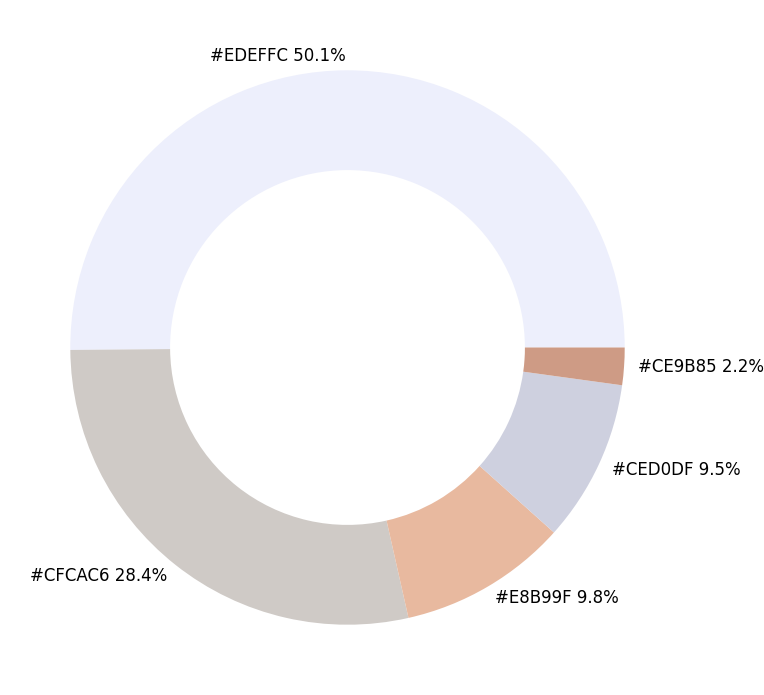

In [40]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                      )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()